# Imports

In [1]:
import sys
import warnings

sys.path.append('../../src')
warnings.filterwarnings('ignore')

from data_loading import YearLoader
import pandas as pd
from stats_helpers import *

# Functions

In [2]:
def gravity_code_to_string(grav_code):
    """
    Function that convert an accident code of gravity into its string value
    
    Parameters
    ----------
    atm_code : int
        The code of the gravity
    
    Returns
    -------
    String
        The string value
    """
    
    dict_gravity_code = {
        1 : "Unharmed",
        2 : "Killed",
        3 : "Injured and hospitalized",
        4 : "Slightly injured",
    }
    
    return dict_gravity_code[grav_code]

In [3]:
def get_gravity(secu_codes, year):
    """
    Function that returns a Dataframe containing for
    the given security items, the gravity and the number 
    of accidents
    
    Parameters
    ----------
    secu_codes : int
        The code(s) of the security equipment
    year : int
        The year
    
    Returns
    -------
    DataFrame
        The dataframe containing the number of accidents
    """
    
    # Load dataset
    loader = YearLoader(year)
    passengers = loader.get_dataframe("passengers")
    passengers = passengers.dropna(subset=['secu'])
    passengers['secu'] = passengers['secu'].astype(int)
    
    # Count the accidents
    pass_given_secu = passengers[passengers['secu'].apply(lambda x : x in secu_codes)]
    df_grav = pass_given_secu["grav"].value_counts().sort_index().rename_axis('grav').reset_index(name='counts')
    df_grav["grav"] = df_grav["grav"].apply(lambda x : gravity_code_to_string(x))
    
    # Adding percentage
    count = df_grav["counts"].sum()
    df_grav["perc"] = df_grav["counts"] / count * 100
    
    return df_grav.set_index('grav')
    
def get_gravity_over_years(secu_codes, years):
    df_full_grav = get_gravity(secu_codes, years[0])
    
    for year in years[1:]:
        df_grav_year = get_gravity(secu_codes, year)
        df_full_grav += df_grav_year
        
    # Fixing percentage
    count = df_full_grav["counts"].sum()
    df_full_grav["perc"] = df_full_grav["counts"]/count * 100
        
    return df_full_grav

# Gravity given security equipment

## Gravity with seatbelt

In [4]:
codes_seatbelt = [11]           # Codes if seatbelt attached
years = list(range(2008, 2019)) # All years

In [5]:
df_grav = get_gravity_over_years(codes_seatbelt, years)
df_grav.head()

,counts,perc
grav,,
Unharmed,506165,57.268007
Killed,15951,1.804712
Injured and hospitalized,119810,13.555422
Slightly injured,241927,27.371859


## Gravity without seatbelt

In [6]:
codes_no_seatbelt = [12]        # Codes if no seatbelt
years = list(range(2008, 2019)) # All years

In [7]:
df_grav = get_gravity_over_years(codes_no_seatbelt, years)
count   = df_grav["counts"].sum()
df_grav["perc"] = df_grav["counts"] / count * 100

In [8]:
df_grav.head()

,counts,perc
grav,,
Unharmed,5828,24.080654
Killed,4534,18.733989
Injured and hospitalized,8324,34.393852
Slightly injured,5516,22.791505


# Seatbelt Statistics

In [9]:
data = stats_df_security_gravity([11,12],years)

data.head()

,grav,secu
0,1,11
2,3,11
3,1,11
7,1,11
9,1,11


In [10]:
##Test for p-value to see if it matches the one calculated with ChiSquare

from scipy.stats import ttest_ind
import scipy.stats as ss

ss.ttest_ind(a=data['secu'],b=data['grav'],equal_var=False)

Ttest_indResult(statistic=2058.6457707572895, pvalue=0.0)

In [11]:
Chi_square_gravity_vs_seatbelt = ChiSquare(data['secu'],data['grav'])

contingency_table :-
 grav      1     2      3      4
secu                           
11    52995  1686  13075  24615
12      721   543   1054    638
Observed Values :-
 [[52995  1686 13075 24615]
 [  721   543  1054   638]]
Expected Values :-
 [[52050.31770642  2159.88082075 13690.87308947 24469.92838335]
 [ 1665.68229358    69.11917925   438.12691053   783.07161665]]
Degree of Freedom:- 1
chi-square statistic:- 3905.811786814595
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 3905.811786814595
critical_value: 3.841458820694124
p-value: 0.0
Chi-square test result : Reject H0, There is a relationship between 2 categorical variables
Reject H0 with 95% level of confidence.


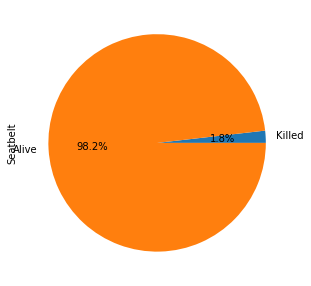

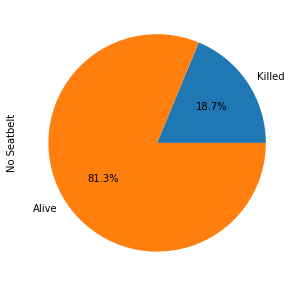

In [12]:
plot_seatbelt_vs_gravity_contingency()

## Gravity with helmet

In [13]:
codes_helmet = [21]             # Codes if helmet
years = list(range(2008, 2019)) # All years

In [14]:
df_grav = get_gravity_over_years(codes_helmet, years)
count   = df_grav["counts"].sum()
df_grav["perc"] = df_grav["counts"] / count * 100

In [15]:
df_grav.head()

,counts,perc
grav,,
Unharmed,25085,8.709888
Killed,9777,3.394721
Injured and hospitalized,100725,34.973230
Slightly injured,152419,52.922161


## Gravity without helmet

In [16]:
codes_no_helmet = [22]          # Codes if no helmet
years = list(range(2008, 2019)) # All years

In [17]:
df_grav = get_gravity_over_years(codes_no_helmet, years)
count   = df_grav["counts"].sum()
df_grav["perc"] = df_grav["counts"] / count * 100

In [18]:
df_grav.head()

,counts,perc
grav,,
Unharmed,1001,5.998322
Killed,1203,7.208773
Injured and hospitalized,7777,46.602349
Slightly injured,6707,40.190556


## Gravity with reflective device

In [19]:
codes_refl_dev = [41]             # Codes if helmet
years = list(range(2008, 2019)) # All years

In [20]:
df_grav = get_gravity_over_years(codes_refl_dev, years)
count   = df_grav["counts"].sum()
df_grav["perc"] = df_grav["counts"] / count * 100


In [21]:
df_grav.head()

,counts,perc
grav,,
Unharmed,334,16.065416
Killed,112,5.387205
Injured and hospitalized,597,28.715729
Slightly injured,1036,49.831650


## Gravity without reflective device

In [22]:
codes_no_refl_dev = [42]          # Codes if no helmet
years = list(range(2008, 2019)) # All years

In [23]:
df_grav = get_gravity_over_years(codes_no_refl_dev, years)
count   = df_grav["counts"].sum()
df_grav["perc"] = df_grav["counts"] / count * 100

In [24]:
df_grav.head()

,counts,perc
grav,,
Unharmed,75,4.564820
Killed,191,11.625076
Injured and hospitalized,740,45.039562
Slightly injured,637,38.770542
